# Initialise 

In [1]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload 2
import c14
from c14 import livermodels as lm



In [3]:
data = pd.read_csv('./results/C14data_liver_samples_20190502.csv')
c14_patient_data = data.groupby(['type', 'sample', 'ploidy', 'pathology']).mean().dropna(how='all').reset_index()
c14_patient_data['age'] = c14_patient_data.Dcoll - c14_patient_data.Dbirth 
c14_patient_data['e14C'] = c14_patient_data.error_measurement
data = c14_patient_data.query('type == "hepatocyte"')
edata = c14.exp_data(data)

In [4]:
m  = lm.Pd()
op = c14.optimize(model=m,data=edata,step_size=2)
vis= c14.visualisze(model=m,data=edata)


In [5]:
op.loglike_dict(dict(kappa=-2.3,lambda2=-0.21,lambda4=-0.97,p=1.57))

107.03456699153871

In [6]:
m.set_parameters(dict(kappa=-2.3,lambda2=-0.21,lambda4=-0.97,p=1.57))

True

In [7]:
m


Parameters are:
kappa = 0.005011872336272725
lambda2 = 0.6165950018614822
lambda4 = 0.10715193052376065
p = 0.9999998414659172

Implicit Parameters are:
delta2 = [0.6154896221076926, 0.620768829216007, 0.6263063135142047, 0.6315529313380516, 0.6336055054218577]
delta4 = [0.12220859687889436, 0.07832585584071022, 0.07684692953793086, 0.08586965939762664, 0.09055696888552868]

Variables are t=[0,25,50,75,100]:
n2
n4

Default parameters are:
kappa = 1
lambda4 = 1
lambda2 = 1
p = 0.5

Default limit are:
kappa = (1e-06, 100)
lambda4 = (1e-06, 100)
lambda2 = (1e-06, 100)
p = (0, 1)

Default errors are:
kappa = 0.5
lambda4 = 0.5
lambda2 = 0.5
p = 0.5

In [8]:
m.limit['kappa'] = (1e-99, 0.1)
m.limit['lambda4'] = (1e-99, 1e0)
m.limit['lambda2'] = (1e-99, 1e0)

In [9]:
m


Parameters are:
kappa = 0.005011872336272725
lambda2 = 0.6165950018614822
lambda4 = 0.10715193052376065
p = 0.9999998414659172

Implicit Parameters are:
delta2 = [0.6154896221076926, 0.620768829216007, 0.6263063135142047, 0.6315529313380516, 0.6336055054218577]
delta4 = [0.12220859687889436, 0.07832585584071022, 0.07684692953793086, 0.08586965939762664, 0.09055696888552868]

Variables are t=[0,25,50,75,100]:
n2
n4

Default parameters are:
kappa = 1
lambda4 = 1
lambda2 = 1
p = 0.5

Default limit are:
kappa = (1e-99, 0.1)
lambda4 = (1e-99, 1.0)
lambda2 = (1e-99, 1.0)
p = (0, 1)

Default errors are:
kappa = 0.5
lambda4 = 0.5
lambda2 = 0.5
p = 0.5

# Fit

In [10]:
res = op.optimize_minuit(dict(kappa=-2.3,lambda2=-0.21,lambda4=-0.97,p=1.57))

In [11]:
res

({'kappa': -4.95647923810181,
  'lambda2': -0.3028087764610116,
  'lambda4': -0.9583954969356988,
  'p': 1.570708827737505},
 {'kappa': 95.9761932313072,
  'lambda2': 0.25018739377963617,
  'lambda4': 0.05946687039069247,
  'p': 0.15598592256642252},
 -107.41726413584584,
 True,
             kappa   lambda2   lambda4         p
 kappa    1.000000  0.032798  0.022960 -0.000113
 lambda2  0.032798  1.000000 -0.664009 -0.003406
 lambda4  0.022960 -0.664009  1.000000 -0.001427
 p       -0.000113 -0.003406 -0.001427  1.000000,
                kappa   lambda2   lambda4         p
 kappa    9211.429667  0.787551  0.131044 -0.001685
 lambda2     0.787551  0.062594 -0.009879 -0.000133
 lambda4     0.131044 -0.009879  0.003536 -0.000013
 p          -0.001685 -0.000133 -0.000013  0.024332)

In [13]:
fit_limit = {'kappa': (-10, -1),
             'lambda4': (-10, 0),
             'lambda2': (-3, 0),
             'p': (-1, 1.5)}

In [16]:
%%time
res_M = op.optimize_minuit_multistart(n=100,processes=7, fit_limit=fit_limit)

[(-10, -1), (-3, 0), (-10, 0), (-1, 1)]


/home/fabrost/pksCloud/projects/C14_liver/source/c14/c14/optimize.py:99: UserWarning: Value Error in ode int: delta2 is negative
  warnings.warn("Value Error in ode int: " + str(e), UserWarning)
/home/fabrost/pksCloud/projects/C14_liver/source/c14/c14/optimize.py:99: UserWarning: Value Error in ode int: delta2 is negative
  warnings.warn("Value Error in ode int: " + str(e), UserWarning)
/home/fabrost/pksCloud/projects/C14_liver/source/c14/c14/optimize.py:99: UserWarning: Value Error in ode int: delta2 is negative
  warnings.warn("Value Error in ode int: " + str(e), UserWarning)
/home/fabrost/pksCloud/projects/C14_liver/source/c14/c14/optimize.py:99: UserWarning: Value Error in ode int: delta2 is negative
  warnings.warn("Value Error in ode int: " + str(e), UserWarning)
/home/fabrost/pksCloud/projects/C14_liver/source/c14/c14/optimize.py:99: UserWarning: Value Error in ode int: need at least one array to concatenate
  warnings.warn("Value Error in ode int: " + str(e), UserWarning)
/home

CPU times: user 753 ms, sys: 226 ms, total: 979 ms
Wall time: 13min 21s


In [17]:
res_M

Pd,p0,fval,values,errors,corr,cov,valid,n
0,"{'kappa': -6.629138930373737, 'lambda2': -0.14...",-104.233568,"{'kappa': -8.609984102837263, 'lambda2': -0.47...","{'kappa': nan, 'lambda2': nan, 'lambda4': nan,...",kappa lambda2 lambda4 p kappa ...,kappa lambda2 lambda4 p kappa ...,True,41
1,"{'kappa': -8.595832236018072, 'lambda2': -2.53...",inf,"{'kappa': nan, 'lambda2': nan, 'lambda4': nan,...","{'kappa': nan, 'lambda2': nan, 'lambda4': nan,...",kappa lambda2 lambda4 p kappa ...,kappa lambda2 lambda4 p kappa ...,True,41
2,"{'kappa': -4.58996489431112, 'lambda2': -0.875...",-107.417180,"{'kappa': -4.101977943589164, 'lambda2': -0.30...","{'kappa': 40.87962307575083, 'lambda2': 0.2505...",kappa lambda2 lambda4 ...,kappa lambda2 lambda4 ...,True,41
3,"{'kappa': -2.508016232796204, 'lambda2': -2.36...",inf,"{'kappa': nan, 'lambda2': nan, 'lambda4': nan,...","{'kappa': nan, 'lambda2': nan, 'lambda4': nan,...",kappa lambda2 lambda4 p kappa ...,kappa lambda2 lambda4 p kappa ...,True,41
4,"{'kappa': -7.261819813364161, 'lambda2': -1.42...",inf,"{'kappa': nan, 'lambda2': nan, 'lambda4': nan,...","{'kappa': nan, 'lambda2': nan, 'lambda4': nan,...",kappa lambda2 lambda4 p kappa ...,kappa lambda2 lambda4 p kappa ...,True,41
5,"{'kappa': -4.493323947498585, 'lambda2': -2.58...",inf,"{'kappa': nan, 'lambda2': nan, 'lambda4': nan,...","{'kappa': nan, 'lambda2': nan, 'lambda4': nan,...",kappa lambda2 lambda4 p kappa ...,kappa lambda2 lambda4 p kappa ...,True,41
6,"{'kappa': -5.895370142046676, 'lambda2': -0.64...",-99.017415,"{'kappa': -1.0017856666735914, 'lambda2': -0.6...","{'kappa': nan, 'lambda2': nan, 'lambda4': nan,...",kappa lambda2 lambda4 p kappa ...,kappa lambda2 lambda4 p kappa ...,True,41
7,"{'kappa': -4.668268880241618, 'lambda2': -2.86...",inf,"{'kappa': nan, 'lambda2': nan, 'lambda4': nan,...","{'kappa': nan, 'lambda2': nan, 'lambda4': nan,...",kappa lambda2 lambda4 p kappa ...,kappa lambda2 lambda4 p kappa ...,True,41
8,"{'kappa': -9.414535663132485, 'lambda2': -0.15...",-105.028997,"{'kappa': -14.386455091102128, 'lambda2': -0.4...","{'kappa': nan, 'lambda2': nan, 'lambda4': nan,...",kappa lambda2 lambda4 p kappa ...,kappa lambda2 lambda4 p kappa ...,True,41
9,"{'kappa': -7.2584760774396635, 'lambda2': -2.7...",inf,"{'kappa': nan, 'lambda2': nan, 'lambda4': nan,...","{'kappa': nan, 'lambda2': nan, 'lambda4': nan,...",kappa lambda2 lambda4 p kappa ...,kappa lambda2 lambda4 p kappa ...,True,41


In [18]:
best_res = res_M.loc[res_M['fval'].idxmin()]

In [32]:
best_res['values']

{'kappa': -4.5392330020202145,
 'lambda2': -0.30334525824413267,
 'lambda4': -0.9581141641053073,
 'p': 1.5706957739633447}

In [33]:
10**-0.3

0.5011872336272722

In [30]:
best_res['errors']

{'kappa': 6.595652958647613,
 'lambda2': 0.24362607515508775,
 'lambda4': 0.060958390739525616,
 'p': 0.16720635194630187}

In [34]:
10**(-0.3+0.24)

0.8709635899560807

In [35]:
10**(-0.3-0.24)

0.28840315031266056

# Visualise

In [20]:
m.set_parameters(best_res['values'])

True

In [21]:
m.nparas

4

In [22]:
op.loglike_dict(best_res['values'])

106.8977444616999

In [23]:
op.calc_aicc(best_res['values'])

-202.08120320911408

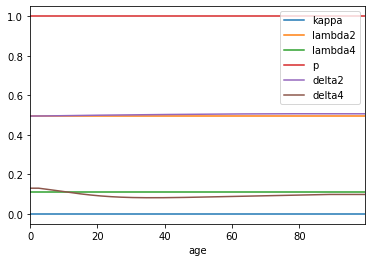

In [24]:
vis.plot_parameter()
plt.legend()
plt.show()

In [25]:
po = best_res['values']
m.set_parameters(po)
_ = vis.odeint()

In [ ]:
vis.plot_generic()

In [ ]:
vis.plot_simdata()

In [ ]:
#vis.plot_simdata_birth()

In [ ]:
l = vis.plot_parameter(log=True,nonlog=['p'])
plt.legend()

In [ ]:
vis.plot_parameter(log=True)
plt.legend()

In [ ]:
m